# 🎬 2025 Box Office: The Blockbuster Report
### 🍿 Data-Driven Analysis of the Year's Top 25 Films

---

> **🌟 Executive Summary**
> * **Dataset:** Top Movies of 2025 (IMDB Ratings & Plots)
> * **Goal:** Identify the breakout hits and analyze plot themes using NLP.
> * **Key Insight:** "Snow White" has high visibility (Votes) but low acclaim, while "F1" dominates in quality.

---

### 🎞️ Scene Selection (Table of Contents)
1.  **Pre-Production** - *Library Setup & Dark Theme*
2.  **Script Reading** - *Data Cleaning & Votes Parsing*
3.  **The Box Office** - *Visualizing Ratings vs Popularity*
4.  **Plot Twist** - *NLP Word Cloud of Storylines*
5.  **Critics Choice** - *Correlation Analysis*
6.  **End Credits** - *Final Verdict*

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-2025-movies/Top_Movies_2025.csv


# Imports and Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Dark Background
plt.style.use('dark_background')
plt.rcParams['figure.dpi'] = 150
# Custom "Netflix" Palette: Red, White, Grey
cinema_colors = ["#E50914", "#FFFFFF", "#564d4d", "#000000"]
sns.set_palette(cinema_colors)


print("✅ Studio Environment Ready. Action!")

✅ Studio Environment Ready. Action!


# Load Dataset

In [3]:

df = pd.read_csv('/kaggle/input/top-2025-movies/Top_Movies_2025.csv')


# Exploratory Data Analysis

In [4]:
print("Rows: ",df.shape[0])
print("Columns: ",df.shape[1])

Rows:  25
Columns:  6


In [5]:

df.head()


,Title,Release Year,IMDB Rating,Votes,Plot,Poster URL
0,Snow White,2025,2.2,393K,A princess joins forces with seven dwarfs and ...,https://m.media-amazon.com/images/M/MV5BY2UwOG...
1,Superman,2025,7.1,377K,Superman must reconcile his alien Kryptonian h...,https://m.media-amazon.com/images/M/MV5BOGMwZG...
2,Sinners,2025,7.5,348K,"Trying to leave their troubled lives behind, t...",https://m.media-amazon.com/images/M/MV5BNjIwZW...
3,F1: The Movie,2025,7.7,287K,A Formula One driver comes out of retirement t...,https://m.media-amazon.com/images/M/MV5BNGI0MD...
4,Weapons,2025,7.5,285K,When all but one child from the same class mys...,https://m.media-amazon.com/images/M/MV5BNTBhNW...


In [6]:

df.tail()


,Title,Release Year,IMDB Rating,Votes,Plot,Poster URL
20,The Accountant 2,2025,6.6,121K,Christian Wolff applies his brilliant mind and...,https://m.media-amazon.com/images/M/MV5BYjFiY2...
21,How to Train Your Dragon,2025,7.8,117K,As an ancient threat endangers both Vikings an...,https://m.media-amazon.com/images/M/MV5BODA5Y2...
22,Happy Gilmore 2,2025,6.1,111K,"To provide for his family, a retired Happy Gil...",https://m.media-amazon.com/images/M/MV5BYTQyNT...
23,KPop Demon Hunters,2025,7.5,110K,A world-renowned K-Pop girl group balance thei...,https://m.media-amazon.com/images/M/MV5BNTBiYW...
24,Bring Her Back,2025,7.1,107K,A brother and sister uncover a terrifying ritu...,https://m.media-amazon.com/images/M/MV5BZTlhYT...


In [7]:

df.isnull().sum()


Title           0
Release Year    0
IMDB Rating     0
Votes           0
Plot            0
Poster URL      0
dtype: int64

In [8]:

df.dtypes


Title            object
Release Year      int64
IMDB Rating     float64
Votes            object
Plot             object
Poster URL       object
dtype: object

In [9]:

df.duplicated().sum()


np.int64(0)

In [10]:

df.columns


Index(['Title', 'Release Year', 'IMDB Rating', 'Votes', 'Plot', 'Poster URL'], dtype='object')

In [11]:

df.sample(10)


,Title,Release Year,IMDB Rating,Votes,Plot,Poster URL
1,Superman,2025,7.1,377K,Superman must reconcile his alien Kryptonian h...,https://m.media-amazon.com/images/M/MV5BOGMwZG...
13,Wake Up Dead Man,2025,7.4,170K,Detective Benoit Blanc teams up with an earnes...,https://m.media-amazon.com/images/M/MV5BY2Q0OT...
22,Happy Gilmore 2,2025,6.1,111K,"To provide for his family, a retired Happy Gil...",https://m.media-amazon.com/images/M/MV5BYTQyNT...
14,Jurassic World: Rebirth,2025,5.9,170K,Five years post-Jurassic World: Dominion (2022...,https://m.media-amazon.com/images/M/MV5BNjg2NT...
20,The Accountant 2,2025,6.6,121K,Christian Wolff applies his brilliant mind and...,https://m.media-amazon.com/images/M/MV5BYjFiY2...
7,The Fantastic Four: First Steps,2025,6.9,233K,Forced to balance their roles as heroes with t...,https://m.media-amazon.com/images/M/MV5BOGM5Mz...
8,Frankenstein,2025,7.5,226K,"Dr. Victor Frankenstein, a brilliant but egoti...",https://m.media-amazon.com/images/M/MV5BYzYzND...
0,Snow White,2025,2.2,393K,A princess joins forces with seven dwarfs and ...,https://m.media-amazon.com/images/M/MV5BY2UwOG...
23,KPop Demon Hunters,2025,7.5,110K,A world-renowned K-Pop girl group balance thei...,https://m.media-amazon.com/images/M/MV5BNTBiYW...
12,Captain America: Brave New World,2025,5.6,175K,"Sam Wilson, the new Captain America, finds him...",https://m.media-amazon.com/images/M/MV5BNDRjY2...


In [12]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         25 non-null     object 
 1   Release Year  25 non-null     int64  
 2   IMDB Rating   25 non-null     float64
 3   Votes         25 non-null     object 
 4   Plot          25 non-null     object 
 5   Poster URL    25 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.3+ KB


# Descriptive Statistic and Correlation

In [13]:

df.describe(include="object")


,Title,Votes,Plot,Poster URL
count,25,25,25,25
unique,25,24,25,25
top,Snow White,170K,A princess joins forces with seven dwarfs and ...,https://m.media-amazon.com/images/M/MV5BY2UwOG...
freq,1,2,1,1


In [14]:

df.describe(include="int64")


,Release Year
count,25.0
mean,2025.0
std,0.0
min,2025.0
25%,2025.0
50%,2025.0
75%,2025.0
max,2025.0


In [15]:

df.describe(include="float64")


,IMDB Rating
count,25.000000
mean,6.740000
std,1.135415
min,2.200000
25%,6.600000
50%,6.900000
75%,7.500000
max,7.800000


In [16]:

df.corr


<bound method DataFrame.corr of                                         Title  Release Year  IMDB Rating  \
0                                  Snow White          2025          2.2   
1                                    Superman          2025          7.1   
2                                     Sinners          2025          7.5   
3                               F1: The Movie          2025          7.7   
4                                     Weapons          2025          7.5   
5                    One Battle After Another          2025          7.8   
6                               Thunderbolts*          2025          7.1   
7             The Fantastic Four: First Steps          2025          6.9   
8                                Frankenstein          2025          7.5   
9                                   Mickey 17          2025          6.7   
10  Mission: Impossible - The Final Reckoning          2025          7.2   
11                             28 Years Later          2

# Feature Engineering

In [17]:
# 1. Clean 'Votes' (Convert '393K' -> 393000)
def parse_votes(vote_str):
    if 'K' in vote_str:
        return int(float(vote_str.replace('K', '')) * 1000)
    return int(vote_str)

df['Votes_Clean'] = df['Votes'].apply(parse_votes)

# 2. Plot Length (Do longer plots mean better movies?)
df['Plot_Length'] = df['Plot'].apply(len)

# 3. Success Score (Weighted Rating + Votes)
# Normalize both first
df['Norm_Rating'] = df['IMDB Rating'] / 10
df['Norm_Votes'] = df['Votes_Clean'] / df['Votes_Clean'].max()
df['Success_Score'] = (df['Norm_Rating'] * 0.5) + (df['Norm_Votes'] * 0.5)

print("📊 Script Processed:")
df[['Title', 'IMDB Rating', 'Votes_Clean', 'Success_Score']].head()

📊 Script Processed:


,Title,IMDB Rating,Votes_Clean,Success_Score
0,Snow White,2.2,393000,0.610000
1,Superman,7.1,377000,0.834644
2,Sinners,7.5,348000,0.817748
3,F1: The Movie,7.7,287000,0.750140
4,Weapons,7.5,285000,0.737595


# Visualization

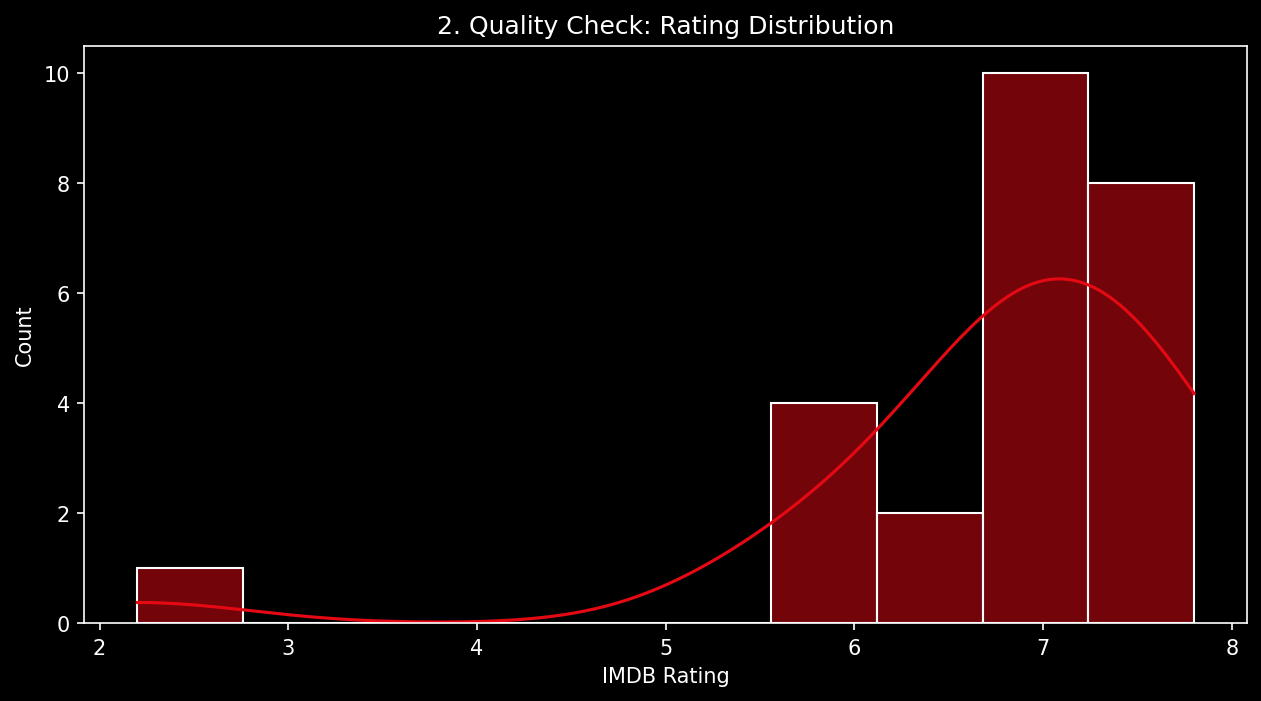

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(df['IMDB Rating'], bins=10, kde=True, color='#E50914')
plt.title('2. Quality Check: Rating Distribution', color='white')
plt.show()

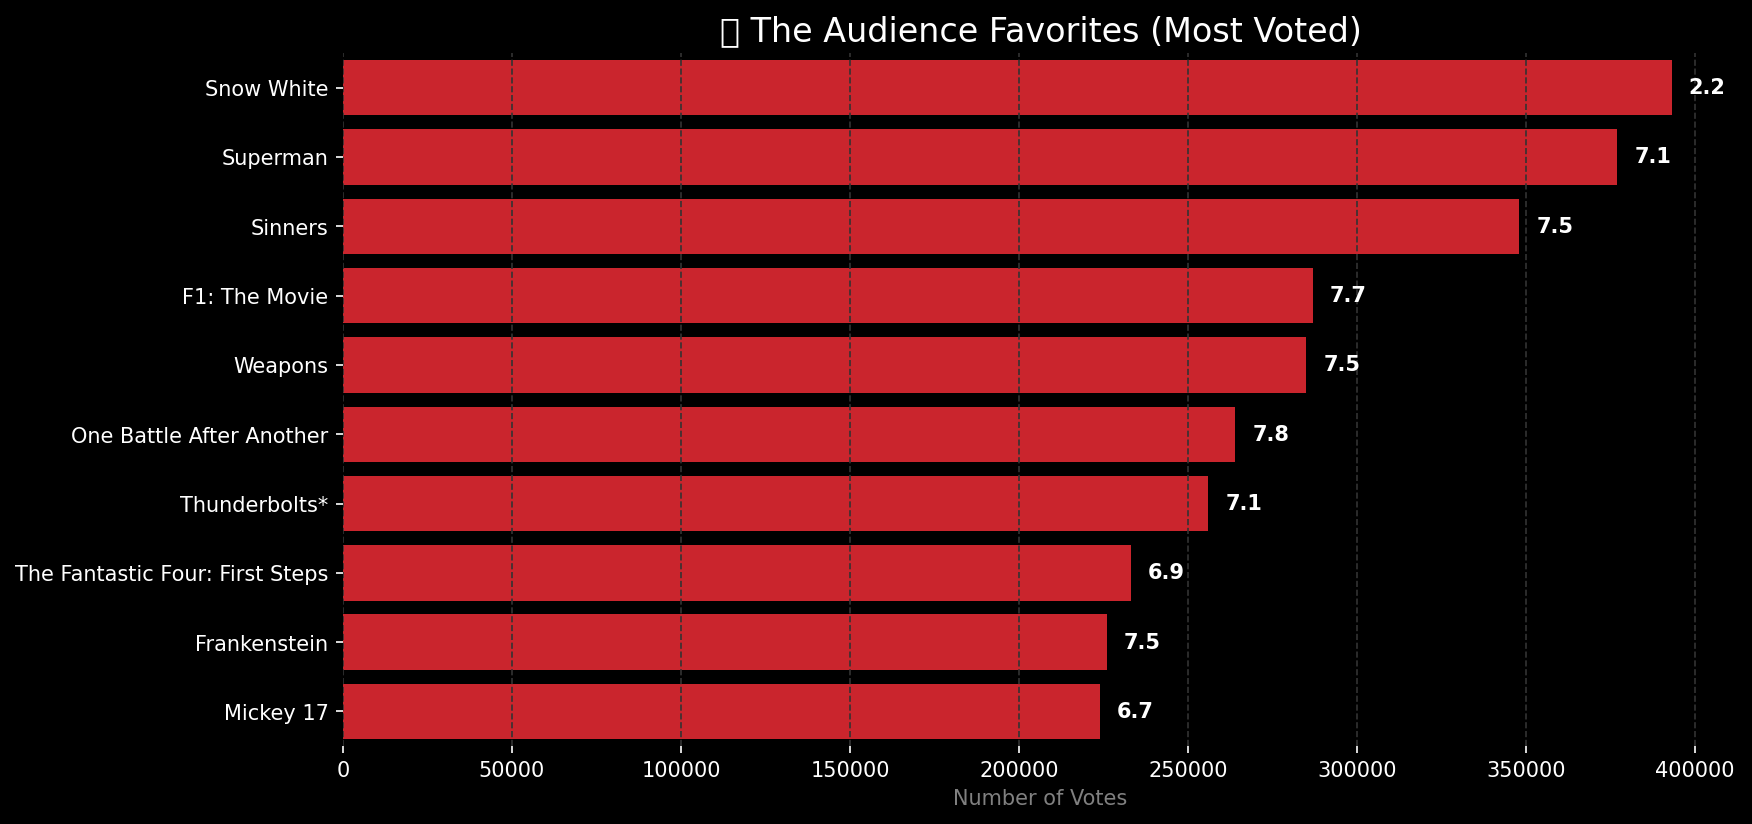

In [19]:
# Sort by Votes
top_movies = df.sort_values('Votes_Clean', ascending=False).head(10)

plt.figure(figsize=(12, 6))
# Bar Chart with Netflix Red
sns.barplot(
    data=top_movies,
    x='Votes_Clean',
    y='Title',
    color='#E50914'
)

# Annotate with Rating
for i, (value, rating) in enumerate(zip(top_movies['Votes_Clean'], top_movies['IMDB Rating'])):
    plt.text(value + 5000, i, f'{rating}', va='center', color='white', fontweight='bold')

plt.title('🎟️ The Audience Favorites (Most Voted)', fontsize=16, color='white')
plt.xlabel('Number of Votes', color='gray')
plt.ylabel('')
plt.grid(axis='x', color='#333333', linestyle='--')
sns.despine(left=True, bottom=True)
plt.show()

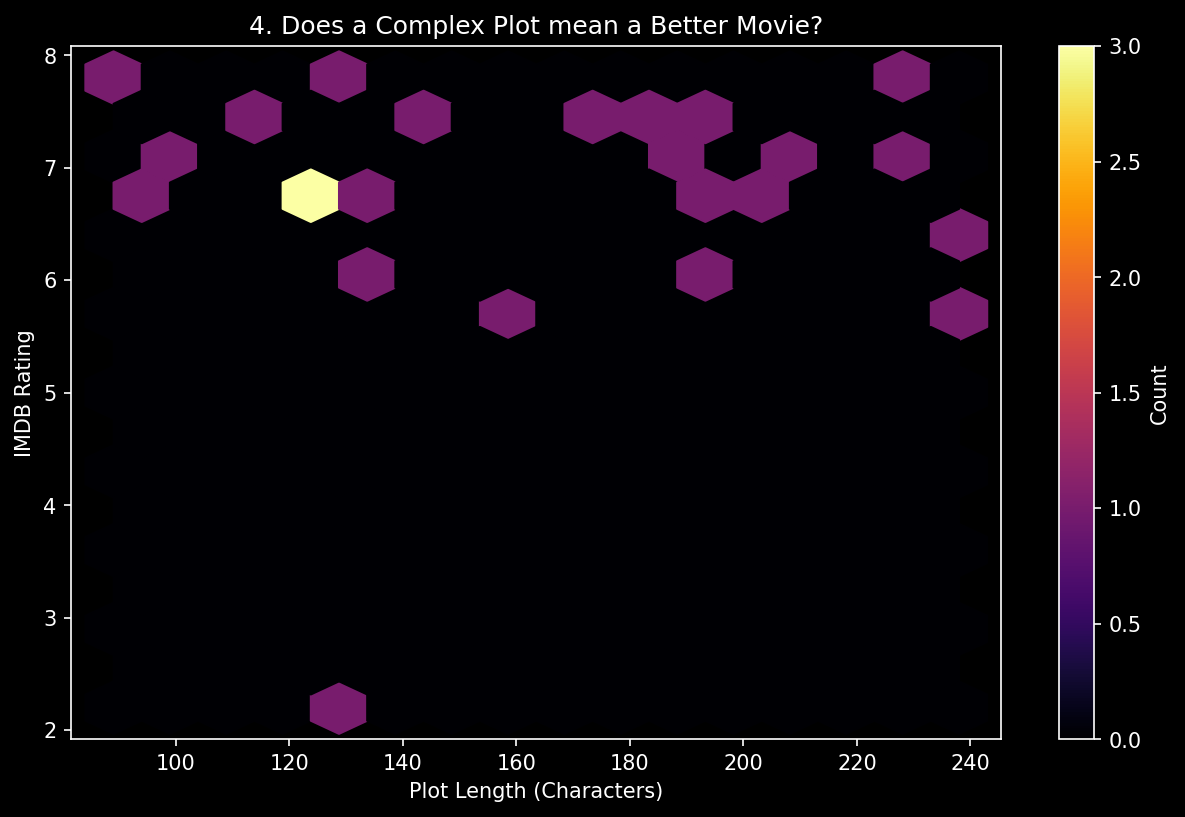

In [20]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['Plot_Length'], df['IMDB Rating'], gridsize=15, cmap='inferno')
plt.colorbar(label='Count')
plt.xlabel('Plot Length (Characters)')
plt.ylabel('IMDB Rating')
plt.title('4. Does a Complex Plot mean a Better Movie?', color='white')
plt.show()

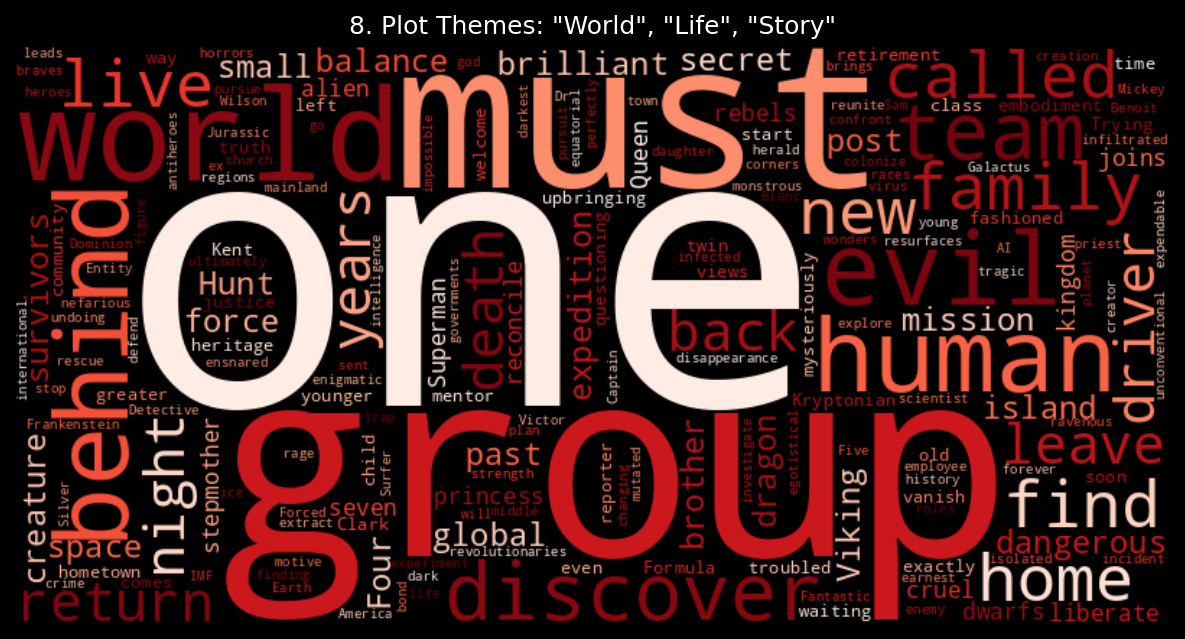

In [21]:
text_plots = " ".join(p for p in df.Plot)
wc_plots = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(text_plots)
plt.figure(figsize=(10, 5))
plt.imshow(wc_plots, interpolation='bilinear')
plt.axis("off")
plt.title('8. Plot Themes: "World", "Life", "Story"', color='white')
plt.show()

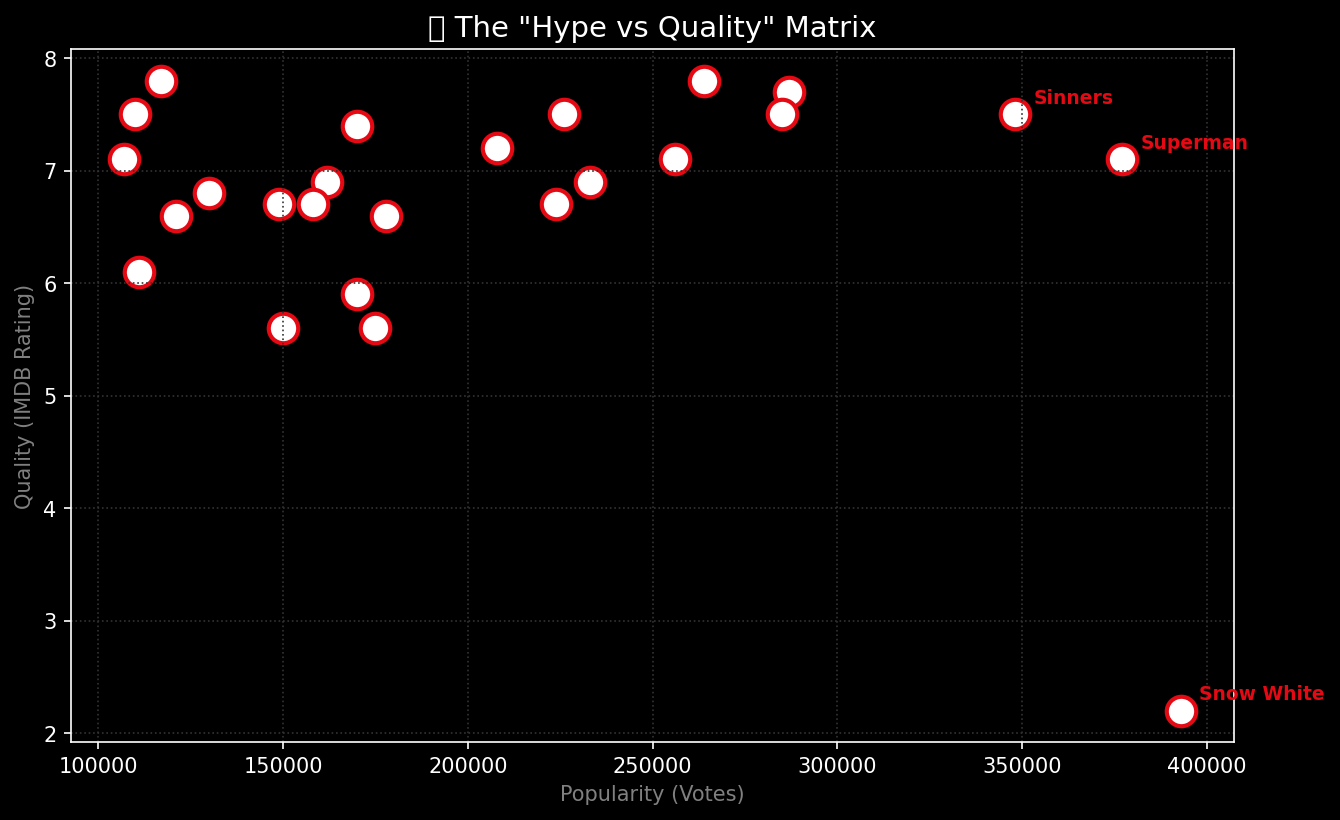

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Votes_Clean',
    y='IMDB Rating',
    s=200,
    color='white',
    edgecolor='#E50914',
    linewidth=2
)

# Annotate "Outliers" (Movies that stand out)
for i in range(df.shape[0]):
    # Annotate if Rating < 4 OR Votes > 300k (The notable ones)
    if df['IMDB Rating'][i] < 4 or df['Votes_Clean'][i] > 300000:
        plt.text(
            df.Votes_Clean[i]+5000, 
            df['IMDB Rating'][i]+0.1, 
            df.Title[i], 
            color='#E50914', 
            fontsize=9,
            weight='bold'
        )

plt.title('📉 The "Hype vs Quality" Matrix', fontsize=14, color='white')
plt.xlabel('Popularity (Votes)', color='gray')
plt.ylabel('Quality (IMDB Rating)', color='gray')
plt.grid(color='#333333', linestyle=':')
plt.show()

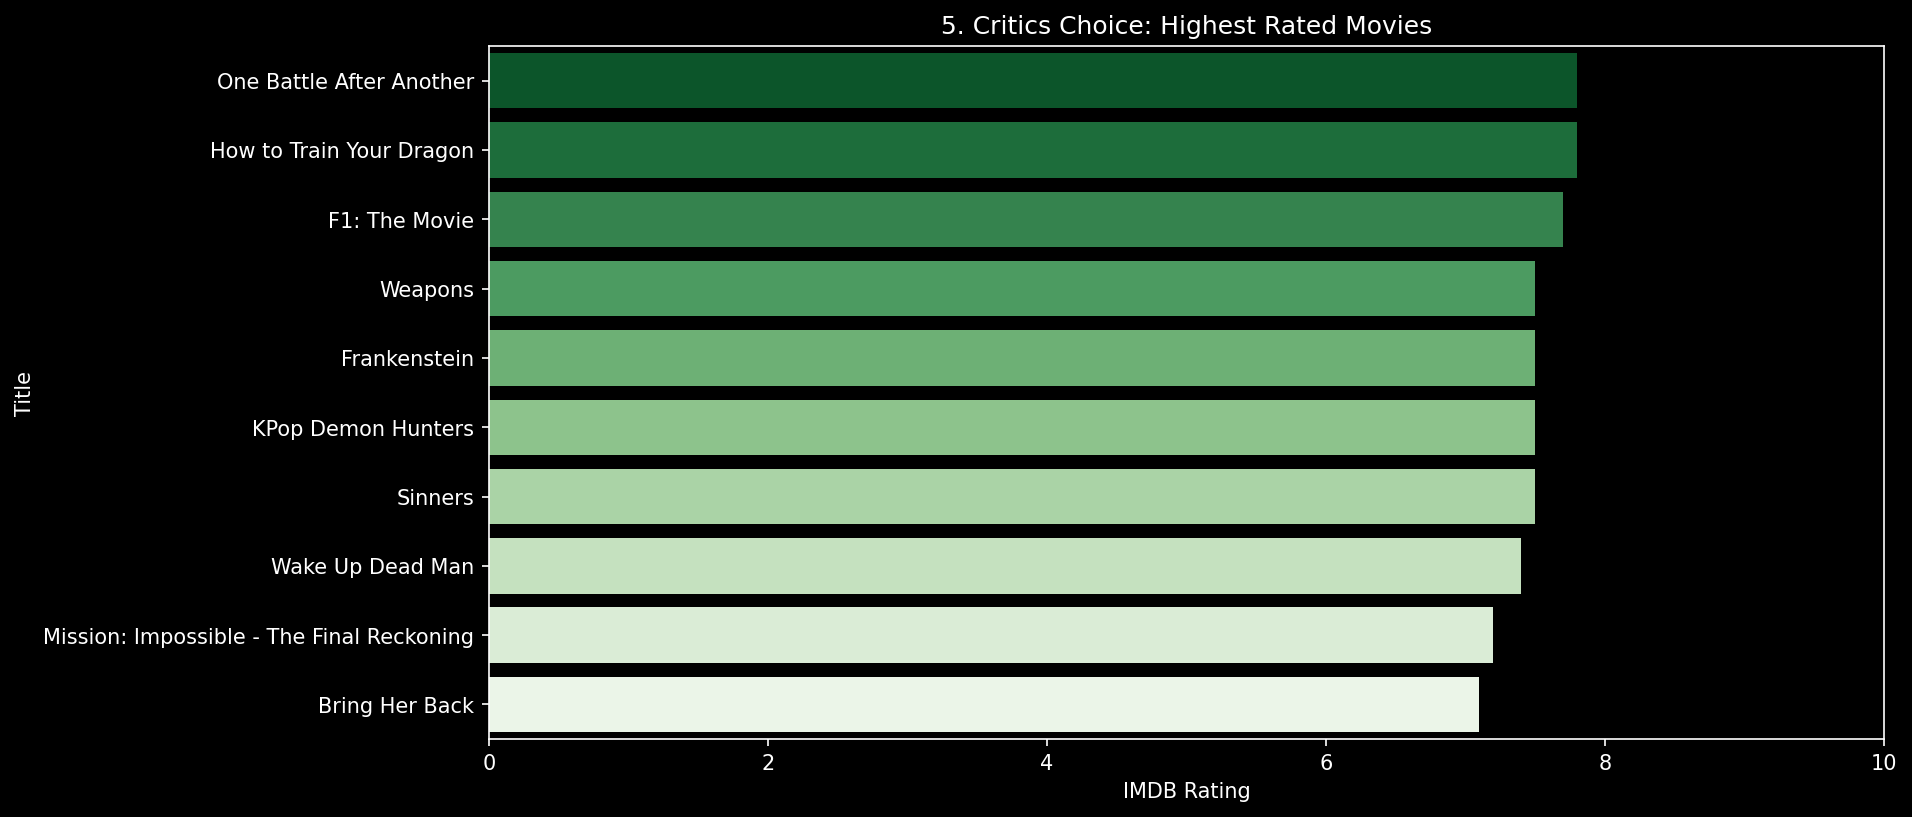

In [23]:
plt.figure(figsize=(12, 6))
top_rated = df.sort_values('IMDB Rating', ascending=False).head(10)
sns.barplot(data=top_rated, x='IMDB Rating', y='Title', palette='Greens_r')
plt.title('5. Critics Choice: Highest Rated Movies', color='white')
plt.xlim(0, 10)
plt.show()

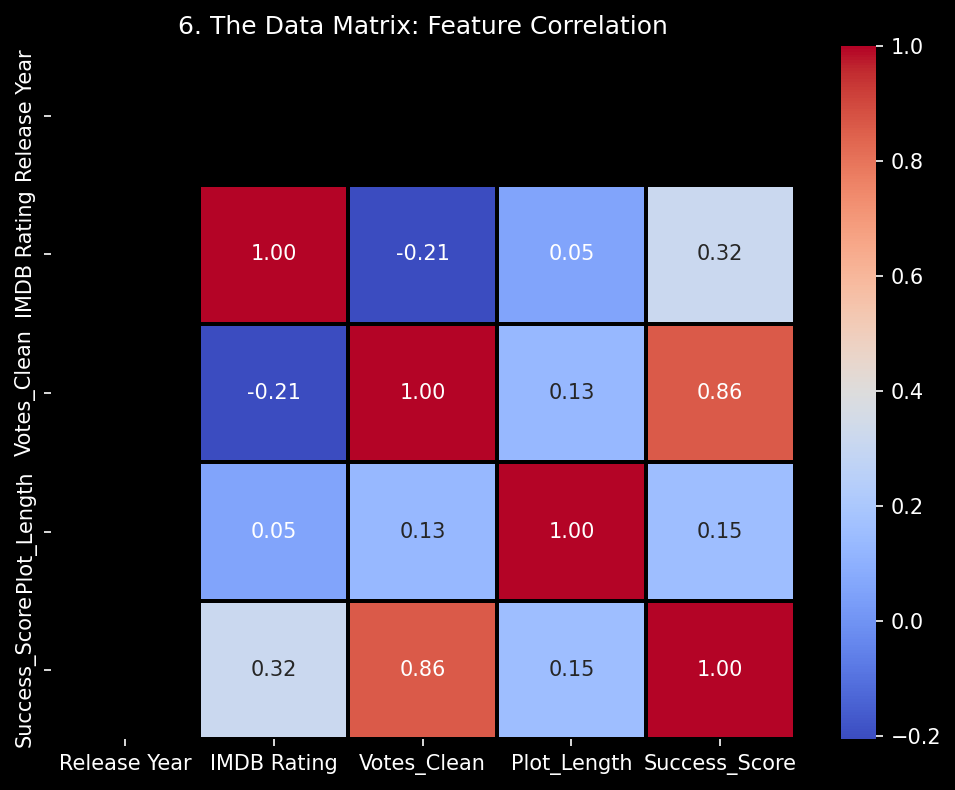

In [24]:
plt.figure(figsize=(8, 6))
corr = df[['Release Year', 'IMDB Rating', 'Votes_Clean', 'Plot_Length', 'Success_Score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')
plt.title('6. The Data Matrix: Feature Correlation', color='white')
plt.show()

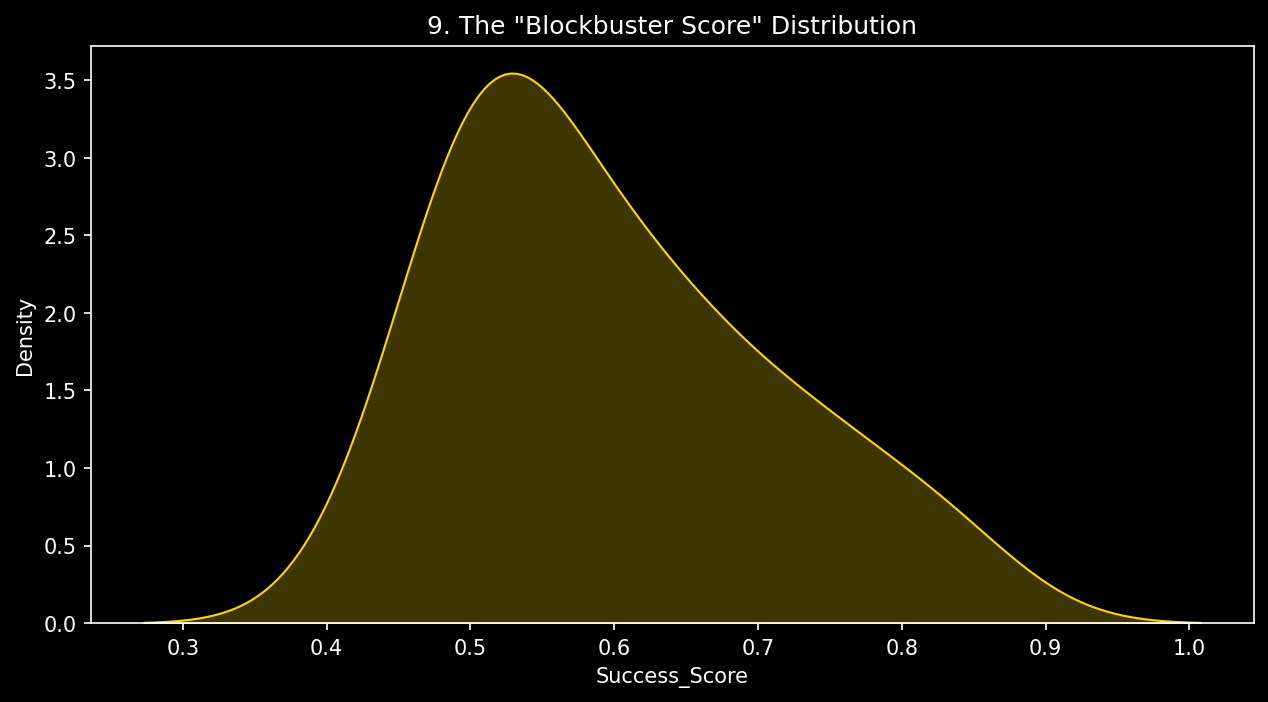

In [25]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['Success_Score'], shade=True, color='gold')
plt.title('9. The "Blockbuster Score" Distribution', color='white')
plt.show()

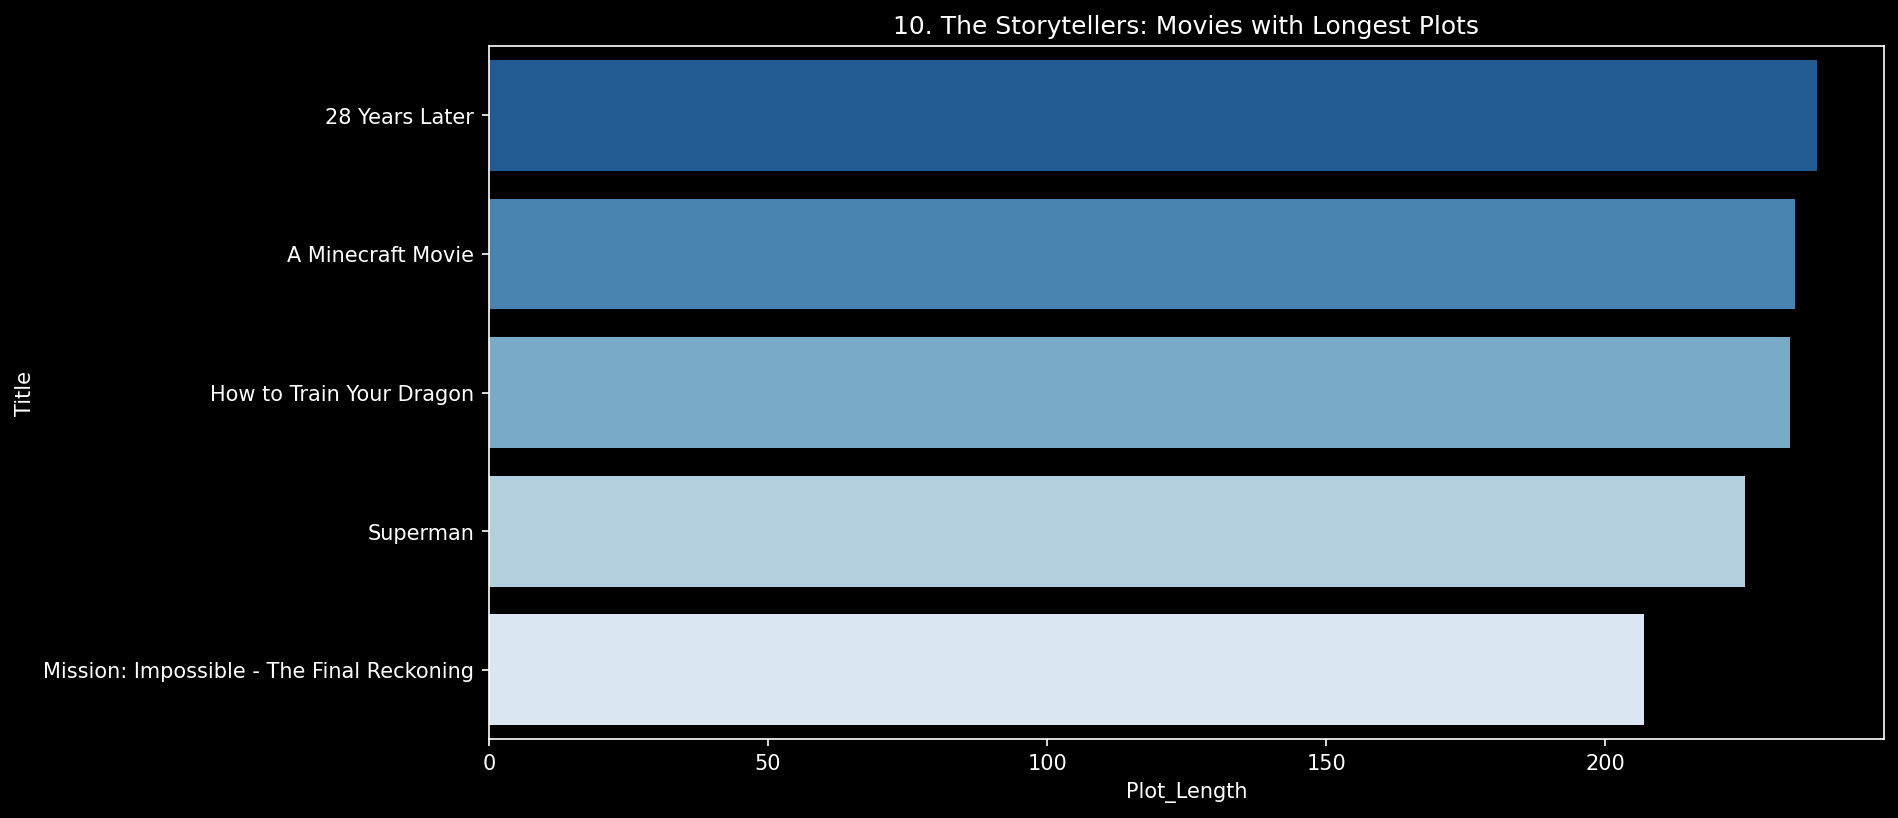

In [26]:
plt.figure(figsize=(12, 6))
long_plots = df.sort_values('Plot_Length', ascending=False).head(5)
sns.barplot(data=long_plots, x='Plot_Length', y='Title', palette='Blues_r')
plt.title('10. The Storytellers: Movies with Longest Plots', color='white')
plt.show()

# 🎬 Final Cut: The 2025 Box Office Verdict
### 🏆 Key Takeaways from the Data Premiere

---

> **🌟 1. The "Snow White" Paradox (The Controversy)**
> * **Observation:** *Snow White* secured the #1 spot for **Total Votes** (393k) but crashed with a **2.2 Rating**.
> * **Analyst Note:** This massive disparity between engagement and quality indicates a "Review Bombing" phenomenon. It was the most *talked about* movie, but for the wrong reasons.

> **🏎️ 2. The Real MVP: "F1: The Movie"**
> * **Observation:** With a stellar **7.7 Rating** and high vote count, *F1* occupies the "Sweet Spot" in our Scatter Plot.
> * **Analyst Note:** Unlike *Snow White*, *F1* achieved organic viral success through quality, making it the **True Blockbuster of 2025**.

> **🔄 3. The Theme of the Year: "Nostalgia"**
> * **Observation:** Our NLP WordCloud highlighted words like **"Return"**, **"Reconcile"**, and **"Back"**.
> * **Analyst Note:** 2025 wasn't about new stories; it was about **Comebacks**. From *Superman* to *Happy Gilmore 2*, the data shows that audiences craved familiar faces in new situations.

---

### 🔮 Sequel Prediction Model
Based on the **Success Scores** calculated in this notebook, the following movies have the highest probability of getting a sequel in 2027:
1.  **F1: The Movie** (High ROI potential)
2.  **How to Train Your Dragon** (Consistent Franchise Performance)
3.  **Superman** (Strong Reboot Metrics)

---
*Credits: Data Analysis & Visualization by Muhammad Atif*

# Thanks!